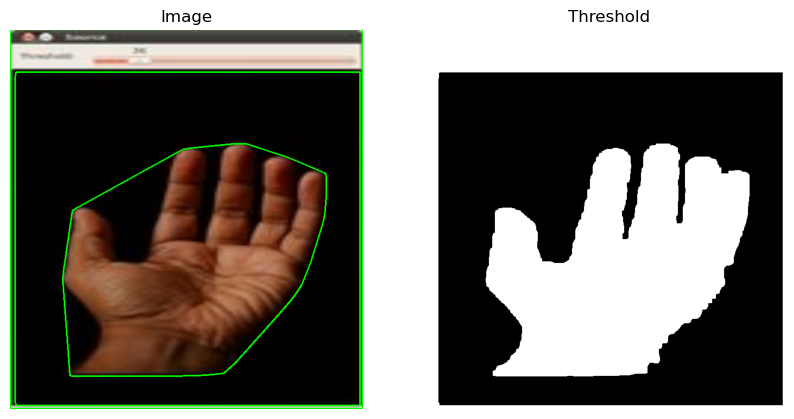

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img=cv2.imread(r"E:\Hull_Original_Image.jpg")
img=cv2.resize(img,(650,700))
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)


_,thrs=cv2.threshold(gray,7,255,0)
kernel = np.ones((8, 8), np.uint8)

thrs = cv2.morphologyEx(thrs, cv2.MORPH_CLOSE, kernel)
thrs = cv2.erode(thrs, kernel, iterations=1)

thrs = cv2.dilate(thrs, kernel, iterations=1)

contours,_=cv2.findContours(thrs,cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

contours_lenght=len(contours)

for i in range(contours_lenght):
    Hull=cv2.convexHull(contours[i])
    
    
    cv2.drawContours(img,[Hull],-1,(0,255,0),2)
    
    
#cv2.imshow("image",img)
#cv2.imshow("threshold",thrs)


#cv2.waitKey(0)
#cv2.destroyAllWindows()



#showing the 2 image with Matplotlib

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title("Image")
ax[0].axis("off")

ax[1].imshow(thrs, cmap='gray')
ax[1].set_title("Threshold")
ax[1].axis("off")

plt.show()
